In [1]:
#first we need to install the required modules
!pip install -U segmentation_models dicom2nifti nilearn --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 93.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 75.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 76.7 MB/s eta 0:00:00


In [2]:
#to create the ensemble we first need the ACDC dataset, and the prep.py script which does the preprocessing of the images and the data augmentation
!gdown https://drive.google.com/uc?id=1qAUJtiPZfT3jm4V4qg-VRVucpZva-Qj_ -O /content/ACDC.zip && unzip -q /content/ACDC.zip -d /content
!gdown https://drive.google.com/uc?id=17qlna9cM-kI4B7XohwSHwPoD5jx0-Qlx -O /content/prep.py

Downloading...
From: https://drive.google.com/uc?id=1qAUJtiPZfT3jm4V4qg-VRVucpZva-Qj_
To: /content/ACDC.zip
100% 2.45G/2.45G [00:28<00:00, 87.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=17qlna9cM-kI4B7XohwSHwPoD5jx0-Qlx
To: /content/prep.py
100% 15.1k/15.1k [00:00<00:00, 49.8MB/s]


In [3]:
#we also download the 3 models we trained and tested
!gdown https://drive.google.com/uc?id=1J8hIRo-GT6XrkWemIum8DjRisjff9lca -O /content/unet_pre-trained.h5
!gdown https://drive.google.com/uc?id=1H0NnKsYLr8l5o1Xe5vfUiZj4Y6STWUKB -O /content/linknet_pre-trained.h5
!gdown https://drive.google.com/uc?id=1_C-tAH4wee_fkPdO8INrvZ2IGpDW8xh0 -O /content/fpn_pre-trained.h5

Downloading...
From: https://drive.google.com/uc?id=1J8hIRo-GT6XrkWemIum8DjRisjff9lca
To: /content/unet_pre-trained.h5
100% 294M/294M [00:04<00:00, 63.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1H0NnKsYLr8l5o1Xe5vfUiZj4Y6STWUKB
To: /content/linknet_pre-trained.h5
100% 260M/260M [00:05<00:00, 49.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1_C-tAH4wee_fkPdO8INrvZ2IGpDW8xh0
To: /content/fpn_pre-trained.h5
100% 288M/288M [00:03<00:00, 72.1MB/s]


In [4]:
#we need to run the prep.py to preprocess the raw data
%run prep.py

 - - - preprocessing started - - - 
x_train:	 shape:  (1000, 256, 256, 3) 	min:  0.0 max:  1.0
x_train_aug:	 shape:  (625, 256, 256, 3) 	min:  0.0 max:  1.0
y_train:	 shape:  (1000, 256, 256, 1) 	min:  0.0 max:  3.0 unique:  [0. 1. 2. 3.]
y_train_aug:	 shape:  (625, 256, 256, 1) 	min:  0.0 max:  3.0 unique:  [0. 1. 2. 3.]
x_test:		 shape:  (500, 256, 256, 3) 	min:  0.0 max:  1.0
x_test_aug:	 shape:  (250, 256, 256, 3) 	min:  0.0 max:  1.0
y_test:		 shape:  (500, 256, 256, 1) 	min:  0.0 max:  3.0 unique:  [0. 1. 2. 3.]
y_test_aug:	 shape:  (250, 256, 256, 1) 	min:  0.0 max:  3.0 unique:  [0. 1. 2. 3.]
 - - - preprocessing finished - - - 


In [5]:
#we download the ensemble.py script that calculates the optimal weights for the models
!gdown https://drive.google.com/uc?id=12G28i0sargd8_WNaanq4fLgTxPEIGWBr -O /content/ensemble.py

Downloading...
From: https://drive.google.com/uc?id=12G28i0sargd8_WNaanq4fLgTxPEIGWBr
To: /content/ensembly.py
100% 12.0k/12.0k [00:00<00:00, 49.2MB/s]


Segmentation Models: using `tf.keras` framework.
Selected models: ['unet_pre-trained', 'linknet_pre-trained', 'fpn_pre-trained']
Model <keras.src.engine.functional.Functional object at 0x7f679093c3a0> loaded.
Model <keras.src.engine.functional.Functional object at 0x7f6792e4f5b0> loaded.
Model <keras.src.engine.functional.Functional object at 0x7f678068aa10> loaded.
x_test: 	 (150, 256, 256, 3) 0.0 1.0 	 [[0.06867965 0.06867965 0.06867965]]
y_test: 	 (150, 256, 256, 1) 0.0 3.0 	 [[0.]] 	labels:  [0. 1. 2. 3.]
5/5 [==============================] - 16s 2s/step

Evaluating models (with equal weights)...
Calculating IOU Scores for weights: [0.1, 0.1, 0.1]
IOU Score for unet_pre-trained = 0.8249919414520264
IOU Score for linknet_pre-trained = 0.809830367565155
IOU Score for fpn_pre-trained = 0.8147404193878174
IOU Score for equally weighted average ensemble = 0.82753825

Performing 64 rounds of random gridsearch to find optimal weights...
Round 1 predicting for weights: [0.25, 0.92, 0.44] 

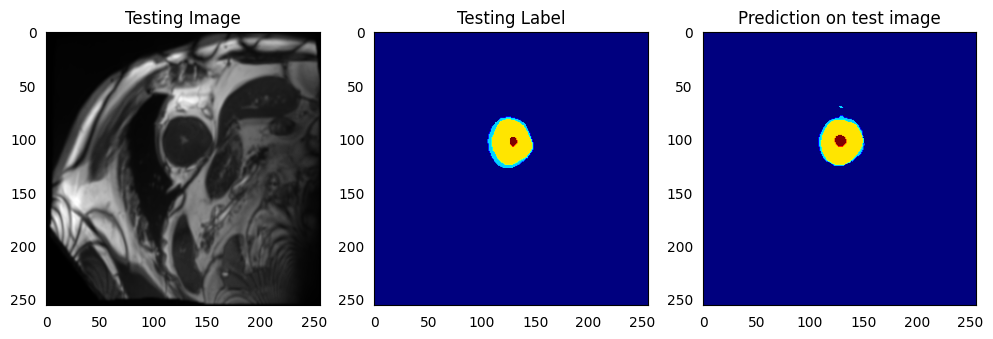


Generating predictions for a random test image...
1/1 [==============================] - 0s 21ms/step
Optimal weights used:  [0.93, 0.2, 0.72]


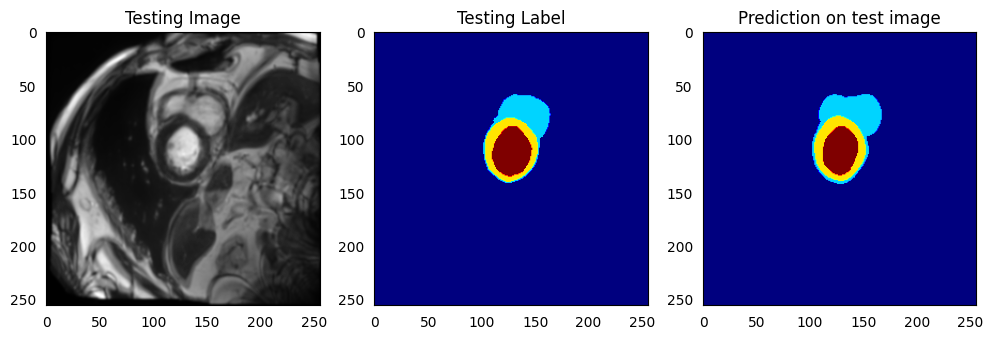


Generating predictions for a random test image...
1/1 [==============================] - 0s 20ms/step
Optimal weights used:  [0.93, 0.2, 0.72]


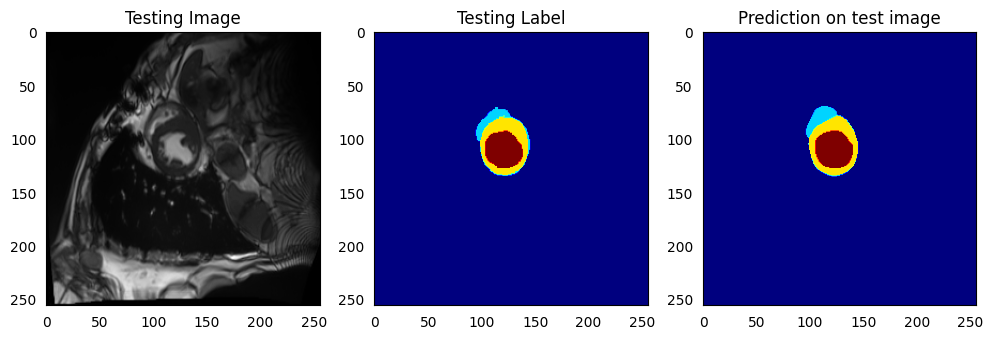

5/5 [==============================] - 1s 295ms/step

all_test_preds: 			 (3, 150, 256, 256, 4) 	 --> should be: (n_models, sample_size, 256, 256, 4)
opt_weighted_preds: 			 (150, 256, 256, 4) 	 --> should be: (sample_size, 256, 256, 4)
opt_weighted_ensemble_prediction: 	 (150, 256, 256) 	 --> should be: (sample_size, 256, 256)
opt_weighted_ensemble_prediction: 	 (150, 256, 256, 1) 	 --> should be: (sample_size, 256, 256, 1)
y_test: 				 (150, 256, 256, 1) 	 --> should be: (sample_size, 256, 256, 1)

Creating confusion matrix...


/content/ensemble.py:114: RuntimeWarning: invalid value encountered in divide
  incorr_fraction = 1 - np.diag(cm) / np.sum(cm, axis=1)


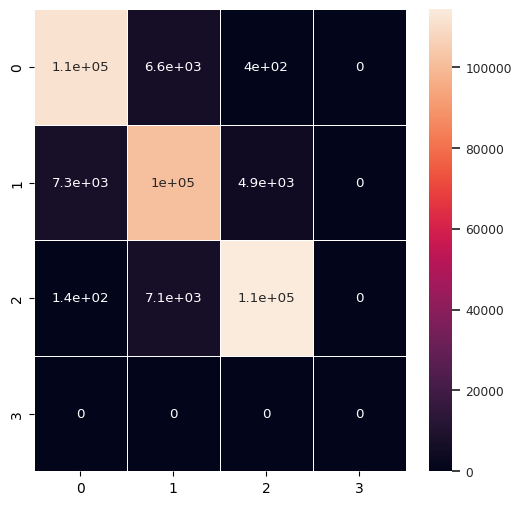

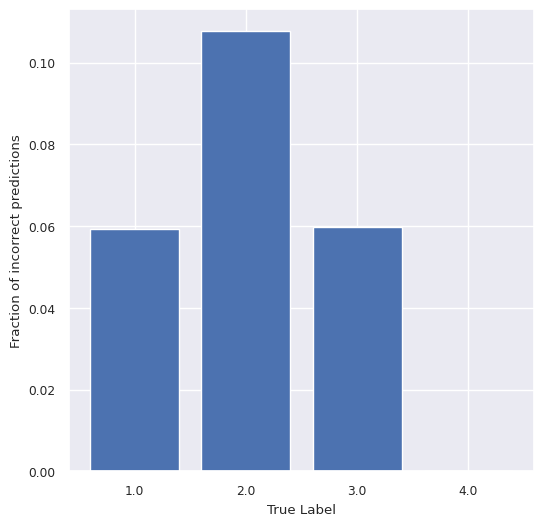

Confusion matrix: 
 [[111210   6619    398      0]
 [  7349 101089   4852      0]
 [   145   7126 114257      0]
 [     0      0      0      0]]

Accuracy: 0.9927364095052084
Precision: 0.992540332363141
Recall: 0.9927364095052084
F1 Score: 0.9926199798168476


<Figure size 640x480 with 0 Axes>

In [7]:
#we run the ensemble.py script with the arguments model_path, models, sample_size, nr_predictions
#if this fails, all you need to do is to click on /usr/local/lib/python3.10/dist-packages/efficientnet/__init__.py in the error message
#and delete "generic_utils" from "keras.utils.generic_utils.get_custom_objects().update(custom_objects)"
#it should be: "keras.utils.get_custom_objects().update(custom_objects)"
#then restart the runtime, and rerun this cell
%run ensemble.py --models unet_pre-trained linknet_pre-trained fpn_pre-trained --sample_size 150 --nr_predictions 3

Segmentation Models: using `keras` framework.
Selected models: ['unet_pre-trained', 'linknet_pre-trained', 'fpn_pre-trained']
Model <keras.src.engine.functional.Functional object at 0x7cccb27b6770> loaded.
Model <keras.src.engine.functional.Functional object at 0x7cccb1bef400> loaded.
Model <keras.src.engine.functional.Functional object at 0x7cccb265caf0> loaded.
x_test: 	 (300, 256, 256, 3) 0.0 1.0 	 [[0.06867965 0.06867965 0.06867965]]
y_test: 	 (300, 256, 256, 1) 0.0 3.0 	 [[0.]] 	labels:  [0. 1. 2. 3.]
10/10 [==============================] - 12s 566ms/step

Evaluating models (with equal weights)...
Calculating IOU Scores for weights: [0.1, 0.1, 0.1]
IOU Score for unet_pre-trained = 0.8197997212409973
IOU Score for linknet_pre-trained = 0.8025847673416138
IOU Score for fpn_pre-trained = 0.809705376625061
IOU Score for equally weighted average ensemble = 0.8218475

Performing 64 rounds of random gridsearch to find optimal weights...
Round 1 predicting for weights: [0.9, 0.8, 0.86] 	

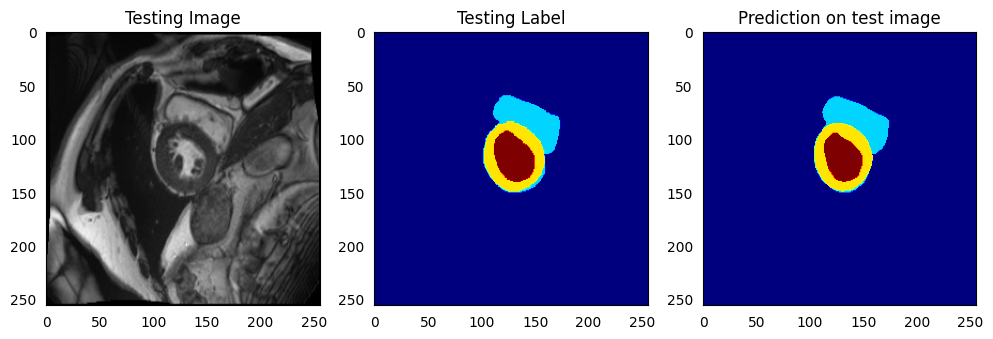


Generating predictions for a random test image...
1/1 [==============================] - 0s 26ms/step
Optimal weights used:  [0.97, 0.28, 0.64]


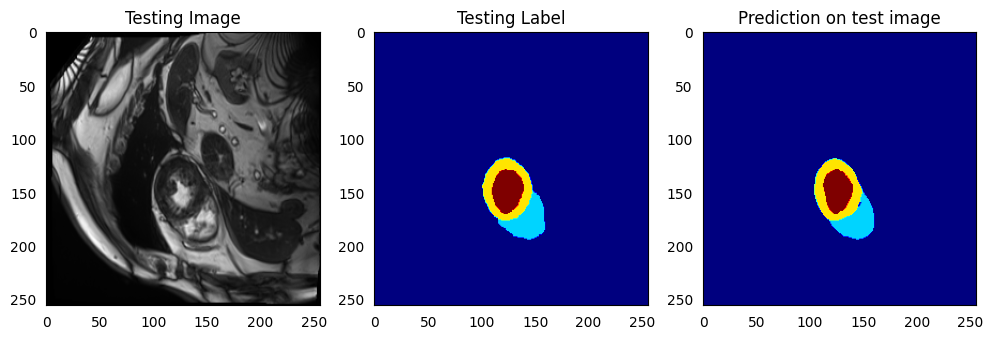


Generating predictions for a random test image...
1/1 [==============================] - 0s 26ms/step
Optimal weights used:  [0.97, 0.28, 0.64]


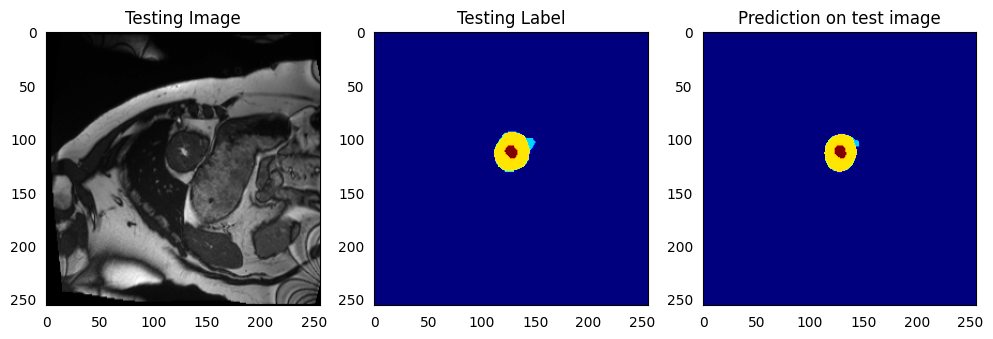


Generating predictions for a random test image...
1/1 [==============================] - 0s 21ms/step
Optimal weights used:  [0.97, 0.28, 0.64]


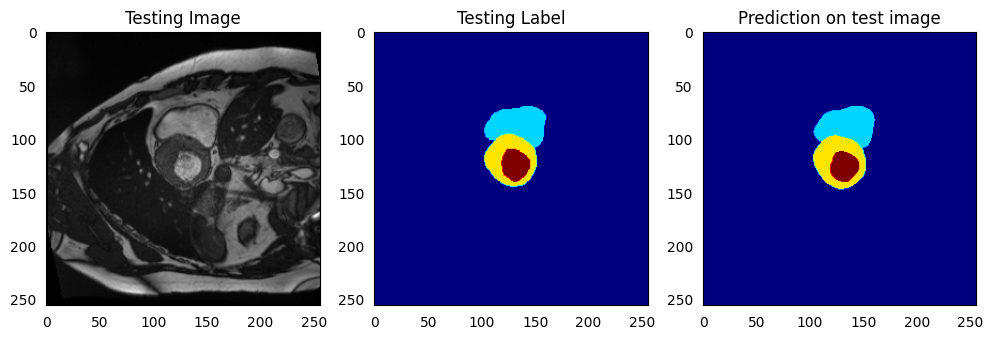


Generating predictions for a random test image...
1/1 [==============================] - 0s 21ms/step
Optimal weights used:  [0.97, 0.28, 0.64]


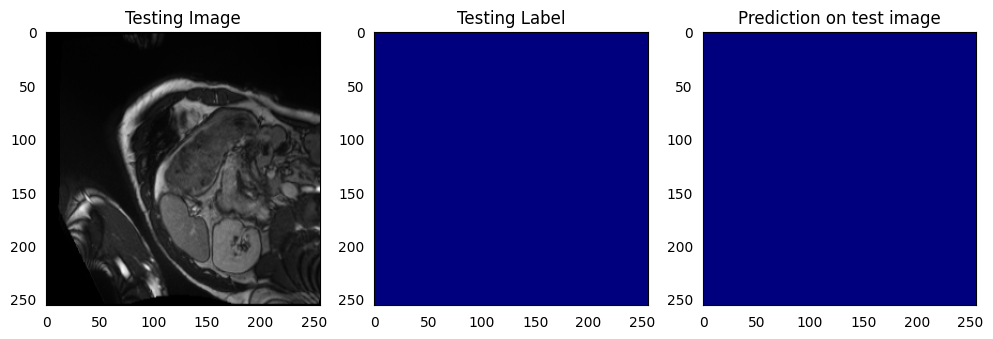

10/10 [==============================] - 3s 297ms/step

all_test_preds: 			 (3, 300, 256, 256, 4) 	 --> should be: (n_models, sample_size, 256, 256, 4)
opt_weighted_preds: 			 (300, 256, 256, 4) 	 --> should be: (sample_size, 256, 256, 4)
opt_weighted_ensemble_prediction: 	 (300, 256, 256) 	 --> should be: (sample_size, 256, 256)
opt_weighted_ensemble_prediction: 	 (300, 256, 256, 1) 	 --> should be: (sample_size, 256, 256, 1)
y_test: 				 (300, 256, 256, 1) 	 --> should be: (sample_size, 256, 256, 1)

Creating confusion matrix...


/content/ensemble.py:114: RuntimeWarning: invalid value encountered in divide
  incorr_fraction = 1 - np.diag(cm) / np.sum(cm, axis=1)


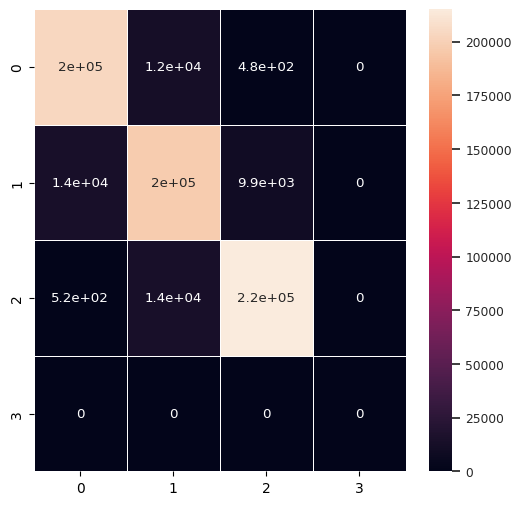

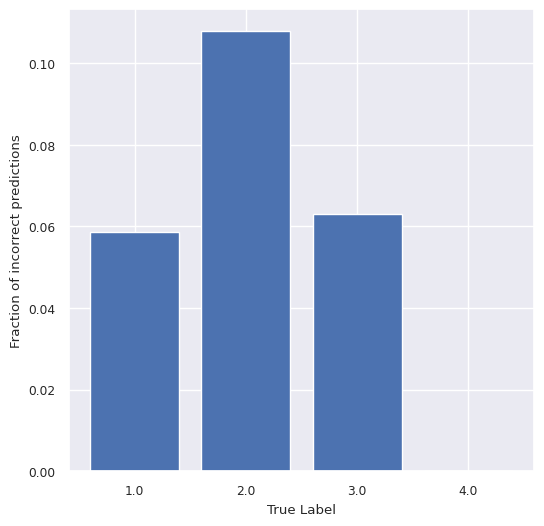

Confusion matrix: 
 [[203706  12238    479      0]
 [ 13957 197135   9873      0]
 [   517  13968 215120      0]
 [     0      0      0      0]]

Accuracy: 0.9927736409505208
Precision: 0.9925445608557251
Recall: 0.9927736409505208
F1 Score: 0.9926352447969017


<Figure size 640x480 with 0 Axes>

In [1]:
%run ensemble.py --models unet_pre-trained linknet_pre-trained fpn_pre-trained --sample_size 300 --nr_predictions 5

In [6]:
#we can download the generated data we want
from google.colab import files
import os
import zipfile

files_in_content = os.listdir('/content')
files_to_zip = [file for file in files_in_content if file.endswith(('.png', '.txt'))]

zip_file_path = '/content/files.zip'
with zipfile.ZipFile(zip_file_path, 'w') as zipf:
    for file_name in files_to_zip:
        file_path = os.path.join('/content', file_name)
        zipf.write(file_path, arcname=file_name)

files.download(zip_file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [7]:
!pip freeze

absl-py==1.4.0
aiohttp==3.9.1
aiosignal==1.3.1
alabaster==0.7.13
albumentations==1.3.1
altair==4.2.2
anyio==3.7.1
appdirs==1.4.4
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array-record==0.5.0
arviz==0.15.1
astropy==5.3.4
astunparse==1.6.3
async-timeout==4.0.3
atpublic==4.0
attrs==23.1.0
audioread==3.0.1
autograd==1.6.2
Babel==2.13.1
backcall==0.2.0
beautifulsoup4==4.11.2
bidict==0.22.1
bigframes==0.15.0
bleach==6.1.0
blinker==1.4
blis==0.7.11
blosc2==2.0.0
bokeh==3.3.1
bqplot==0.12.42
branca==0.7.0
build==1.0.3
CacheControl==0.13.1
cachetools==5.3.2
catalogue==2.0.10
certifi==2023.11.17
cffi==1.16.0
chardet==5.2.0
charset-normalizer==3.3.2
chex==0.1.7
click==8.1.7
click-plugins==1.1.1
cligj==0.7.2
cloudpickle==2.2.1
cmake==3.27.7
cmdstanpy==1.2.0
colorcet==3.0.1
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confection==0.1.4
cons==0.4.6
contextlib2==21.6.0
contourpy==1.2.0
cryptography==41.0.7
cufflinks==0.17.3
cupy-cuda11x==11.0.0
cvxopt==1.3.2
cvxpy==1.3.2
cycler==0.12.1
c